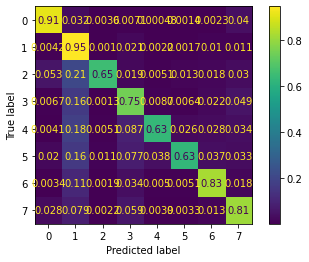

In [13]:
'''Confusion matrix'''

import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from train import data_prep

x_train, y_train, x_valid, y_valid = data_prep()
n_classes = 8
y_train_categ = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_valid_categ = tf.keras.utils.to_categorical(y_valid, num_classes=n_classes)

model_path = './pretrained.hdf5'
model = tf.keras.models.load_model(model_path)
y_pred_categ = model.predict(x_valid)

matrix = confusion_matrix(y_valid_categ.argmax(axis=1), 
                          y_pred_categ.argmax(axis=1),
                          normalize='true') # normalized by rows
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                            # display_labels=clf.classes_
                                )
disp.plot() 

In [4]:
'''Test site prediction visualization'''

import numpy as np
import tensorflow as tf
from classify import classify

arr = np.load('./L8_NLCD_extracted_dataset.npy')
n_test = 3
arr_test = arr[-n_test:,:,:,:] 
arr_nlcd = arr_test[:,:,:,8]
arr_l8 = arr_test[:,:,:,:8]

patch_size = 15
model_path = './pretrained.hdf5'

model = tf.keras.models.load_model(model_path)

arr_cls = classify(arr_l8, model, patch_size)


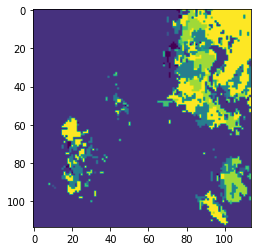

In [6]:
plt.imshow(arr_cls[0,7:-7,7:-7])


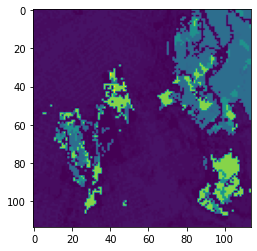

In [7]:
plt.imshow(arr_nlcd[0,7:-7,7:-7])